# Part I - Prosper Loan Data Exploration
## by Ebunoluwa Ajani

## Introduction
> The aim of the project is to explore a dataset containing 113,937 loans with 81 variables on each loan icluding the loan amount, borrower rate(or interest rate), current loan status, borrower income and many others . Then visualize and communicate the findings with actionable insights.
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

In [2]:
df=pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
cols= ['LoanOriginalAmount','BorrowerAPR', 'Term','EmploymentStatus', 'StatedMonthlyIncome','ProsperRating (Alpha)', 'LoanStatus', ]

In [6]:
Loan= df[cols]

In [7]:
#check for duplicated rows in the dataframe, then drop the last 
Loan.duplicated().sum()
Loan[Loan.duplicated()]
Loan=Loan. drop_duplicates(keep='first')

In [8]:
Loan=Loan.drop_duplicates()

In [9]:
Loan.duplicated().sum()

0

In [10]:
#rename the column ProsperRating (Alpha) for easy access
Loan=Loan.rename(columns={'ProsperRating (Alpha)':'Ratings', 'BorrowerAPR':'APR','StatedMonthlyIncome':'Income' })

In [11]:
#all pastdue will be categorized as past due whill will be accompanied by a deliquency bucket for better visualization
print(Loan.LoanStatus.unique())
Loan['LoanStatus'] = Loan['LoanStatus'].replace(['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','FinalPaymentInProgress'],['Past Due','Past Due','Past Due','Past Due','Past Due','Past Due','PayInProgress'])

['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']


In [12]:
Loan['LoanStatus'] = Loan['LoanStatus'].replace(['Past Due (31-60 days)' ],['Past Due'])
print(Loan.LoanStatus.unique())

['Completed' 'Current' 'Past Due' 'Defaulted' 'Chargedoff' 'Cancelled'
 'PayInProgress']


In [13]:
#Remove columns with BorrowerAPR
Loan.APR.value_counts()
Loan=Loan.query("APR!= 'nan'")

In [14]:
Loan.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [15]:
print(Loan.Ratings.unique())
print(Loan.LoanStatus.unique())
print(Loan.EmploymentStatus.unique())
print(Loan.Term.unique())

[nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']
['Completed' 'Current' 'Past Due' 'Defaulted' 'Chargedoff' 'Cancelled'
 'PayInProgress']
['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan
 'Not employed' 'Part-time' 'Retired']
[36 60 12]


In [16]:
ordinal_var_dict= {'Ratings':['A','D','B','E','C','AA','HR'],
                   'LoanStatus':['Completed','Current','Past Due','Defaulted','Chargedoff'
 ,'Cancelled','PaymentInProgress'],
                   'EmploymentStatus':['Self-employed','Employed', 'Full-time',
 'Not employed', 'Part-time', 'Retired'],
                  'Term': [36,60,12]}
for var in ordinal_var_dict:
    ordered_var=pd.api.types.CategoricalDtype(ordered=True,
                                              categories=ordinal_var_dict[var] )
    Loan[var]=Loan[var].astype(ordered_var)

In [17]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105440 entries, 0 to 113936
Data columns (total 7 columns):
LoanOriginalAmount    105440 non-null int64
APR                   105440 non-null float64
Term                  105440 non-null category
EmploymentStatus      94265 non-null category
Income                105440 non-null float64
Ratings               76722 non-null category
LoanStatus            105238 non-null category
dtypes: category(4), float64(2), int64(1)
memory usage: 3.6 MB


In [18]:
# high-level overview of data shape and composition
print(Loan.shape)
print(Loan.dtypes)
print(Loan.head(10))

(105440, 7)
LoanOriginalAmount       int64
APR                    float64
Term                  category
EmploymentStatus      category
Income                 float64
Ratings               category
LoanStatus            category
dtype: object
    LoanOriginalAmount      APR Term EmploymentStatus       Income Ratings  \
0                 9425  0.16516   36    Self-employed  3083.333333     NaN   
1                10000  0.12016   36         Employed  6125.000000       A   
2                 3001  0.28269   36              NaN  2083.333333     NaN   
3                10000  0.12528   36         Employed  2875.000000       A   
4                15000  0.24614   36         Employed  9583.333333       D   
5                15000  0.15425   60         Employed  8333.333333       B   
6                 3000  0.31032   36         Employed  2083.333333       E   
7                10000  0.23939   36         Employed  3355.750000       C   
8                10000  0.07620   36         Employed  

### Structure of your dataset?

There are 105,440 observations  in the dataset with 7 features (LoanOriginalAmount, BorrowerAPR (APR), Term, Employment status, stated monthly income, Ratings by Prosper and LoanStatus). Most variables are numeric in nature, but the variables Term, Employment Status,Loan status and Ratings are ordered factor variables with the following levels.

Term:36,60,12
EmploymentStatus: Self-employed,Employed,Full-time,Not employed,Part-time and Retired
LoanStatus:  Completed,Current,PastDue,Defaulted,Chargedoff,Cancelled, and PaymentInProgress
Ratings: A,D,B,E,C,AA,HR


I'm most interested in figuring out what features are best for predicting the repayment status.

 I expect that the employment status, APR and borrower's stated income will have strong impact on their loanstatus

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


*Main Variable of Interest:Loan Status*

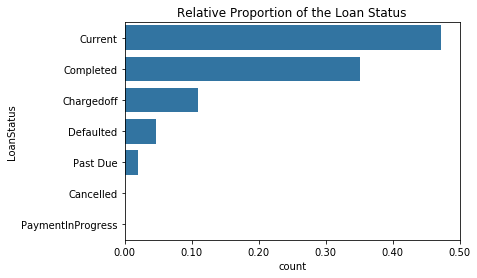

In [19]:
status_counts=Loan['LoanStatus'].value_counts()
status_order=status_counts.index
n_Loan= Loan['LoanStatus'].value_counts().sum()
max_status_count=status_counts[0]
max_prop=max_status_count/n_Loan
base_color=sb.color_palette()[0]
tick_props = np.arange(0, max_prop+0.15,0.1)
tick_names=['{:0.2f}'.format(v)for v in tick_props]
sb.countplot(data=Loan, y='LoanStatus', color=base_color, order=status_order)
plt.xticks(tick_props*n_Loan, tick_names)
plt.title('Relative Proportion of the Loan Status');

The highest frequency as shown is the current loan with about 48% of the entire data while the lowest frequency is the payments in Progress. About 33% of the loans has been completed.

*The predictor variables of interest: Employment Status, APR and income*

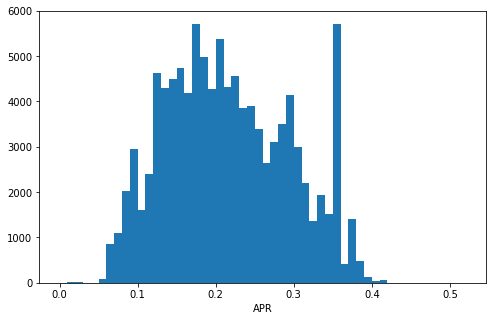

In [20]:
binsize = 0.01
bins = np.arange(0, Loan['APR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = Loan, x = 'APR', bins = bins)
plt.xlabel('APR')
plt.show()

The distribution of the APR appears to be multimodal, only very few of APR are greater than 0.4.
The distribution of the APR have more peaks from 0.1 to 0.3 with obvious peaks at around 0.18 and 0.36

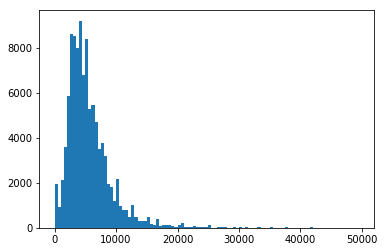

In [21]:
#Distribution of the StatedIncome
bins = np.arange(0, 50000, 500)
plt.hist(data = Loan, x = 'Income', bins=bins);

The distribution is rightly skewed, the plot depicts that only a few of the borrowers earns more than $30,000

In [22]:
Loan.query("Income >=30000")
len(Loan.query("Income >=30000"))/len(Loan['Income'])

0.003290971168437026

In [23]:
Loan= Loan.query("Income <=30000")

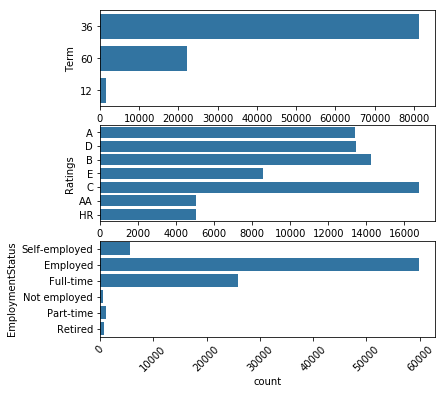

In [24]:
#checking the categorical predictors
ig, ax = plt.subplots(nrows=3, figsize = [6,6])
default_color = sb.color_palette()[0]
sb.countplot(data = Loan, y = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = Loan, y = 'Ratings', color = default_color, ax = ax[1])
sb.countplot(data = Loan, y = 'EmploymentStatus', color = default_color, ax = ax[2]);
plt.xticks(rotation=45);

The Employment Status category valuecount plot shows that the employed  category has the highest frequency, the Rating value count shows that C has the highest value count while AA and HR have the lowest.  For the term, A higher number of the borrowers are on 36 month term followed by 60 months, then 12 months

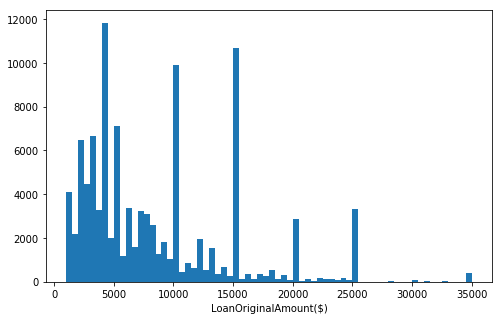

In [25]:
# plotting LoanOriginalAmount on a standard scale

binsize = 500
bins = np.arange(1000, Loan['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = Loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount($)')
plt.show()


There are very large spikes in frequency at around 4000,10000 and 15000, and a general declines from amounts greater than 30000.

*Findings from Univariate Plot*
The highest frequency as shown in the Loan status revealed that the current loan occupies about 48% of the entire Loan disbursed by Prosper while the lowest frequency on the chart is the payments in Progres which is less than 1%

I also wrangled the dataset before exploration for better visualization however from the visualization of the borrowers income, the plot was rightly skewed which means that the distribution is not symmetric and after some investigation, it was reavealed that about less than 0.3% of the borrower's earn more than $30,000.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

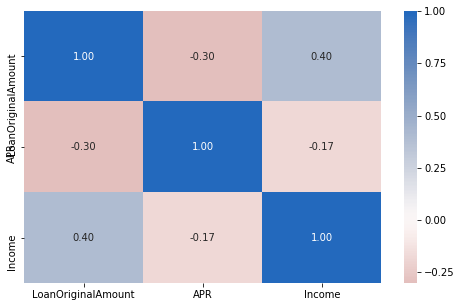

In [26]:
num_vars = ['LoanOriginalAmount', 'APR', 'Income']
cat_vars = ['Term', 'EmploymentStatus', 'LoanStatus']
plt.figure(figsize = [8, 5])
sb.heatmap(Loan[num_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0);

There is a negative correlation of -0.30 between APR and LoanOriginalAmount while the borrower's income is positively correlated with the Original loan amount. The plot also reveals that the income and the APR are negatively correlated.

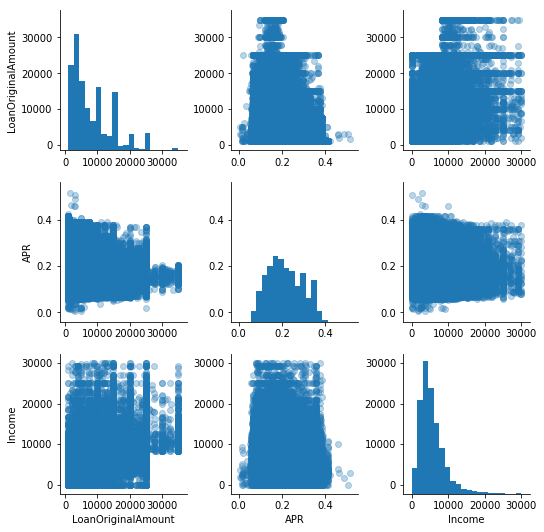

In [27]:
Loan_samp = Loan.sample(100000)

g = sb.PairGrid(data = Loan_samp, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter,alpha=0.3);

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


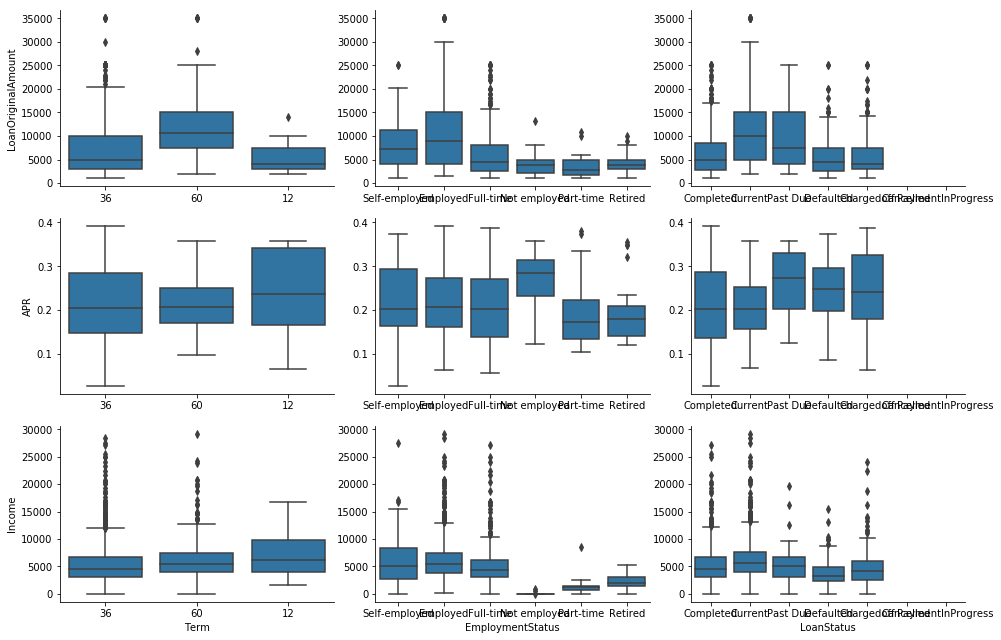

In [28]:
samples = np.random.choice(Loan.shape[0], 2000, replace = False)
Loan_samp = Loan.loc[samples,:]
cat_vars = ['Term', 'EmploymentStatus','LoanStatus']

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = Loan_samp, y_vars = ['LoanOriginalAmount', 'APR', 'Income'], x_vars = cat_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

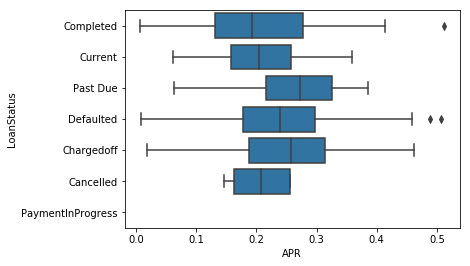

In [29]:
sb.boxplot(data=Loan, x='APR',y='LoanStatus',color=base_color)

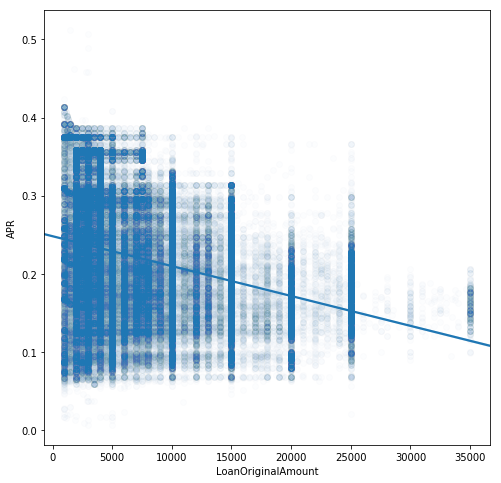

In [30]:
plt.figure(figsize=[8,8])
sb.regplot(data=Loan, x='LoanOriginalAmount', y='APR', scatter_kws={'alpha':0.01});

The plot here reveals that the higher the loan amount, the lower the APR charged on the borrower

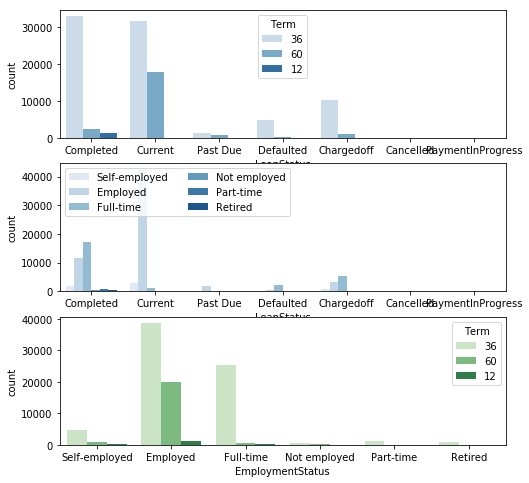

In [31]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = Loan, x = 'LoanStatus', hue = 'Term', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = Loan, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = Loan, x = 'EmploymentStatus', hue = 'Term', palette = 'Greens')


plt.show()

The plot above shows that the term of the loan does have a direct impact on the loan repayment but it seem that the employed have a higher chance of having a 60month term.

It also shows an indication that a higher proportion of the current loans were being disbursed to the employed and full time employed

Next, I would be finding out if there is a relationship possibility between Term, APR and the Loan Amount while also finding out if there are preferences based on the employment status

## Multivariate Exploration

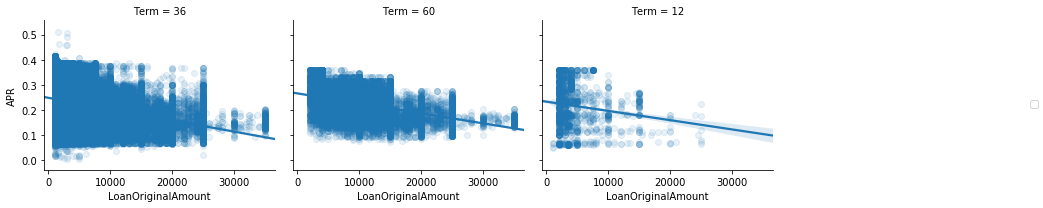

In [32]:
# Term effect on relationship of APR and loan Amount
plt.figure(figsize = [8, 8])
g=sb.FacetGrid(data=Loan, aspect=1.2, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'APR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

Term does not seem to have a relationship with APR and Loan Amount

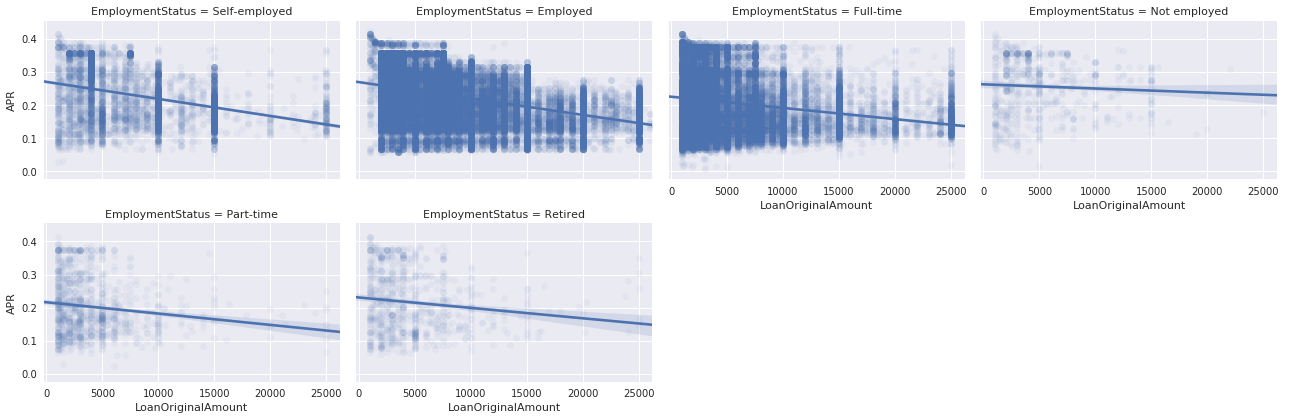

In [33]:
# Employment Status  effect on relationship of APR and loan amount
sb.set(rc = {'figure.figsize':(15,15)})
g=sb.FacetGrid(data=Loan, aspect=1.5, col='EmploymentStatus', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'APR', x_jitter=0.04, scatter_kws={'alpha':0.05});
g.add_legend();

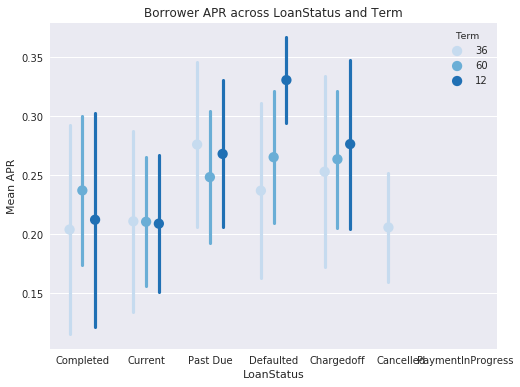

In [34]:
# APR across Loan status and Term
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = Loan, x = 'LoanStatus', y = 'APR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across LoanStatus and Term')
plt.ylabel('Mean APR')
ax.set_yticklabels([],minor = True);

This plot revealed that the 12 month Term have a higher APR compared to the others while a there seems to a number of them defaulting currently.

Lastly, check the effect of the loan amount and the term on the loan status

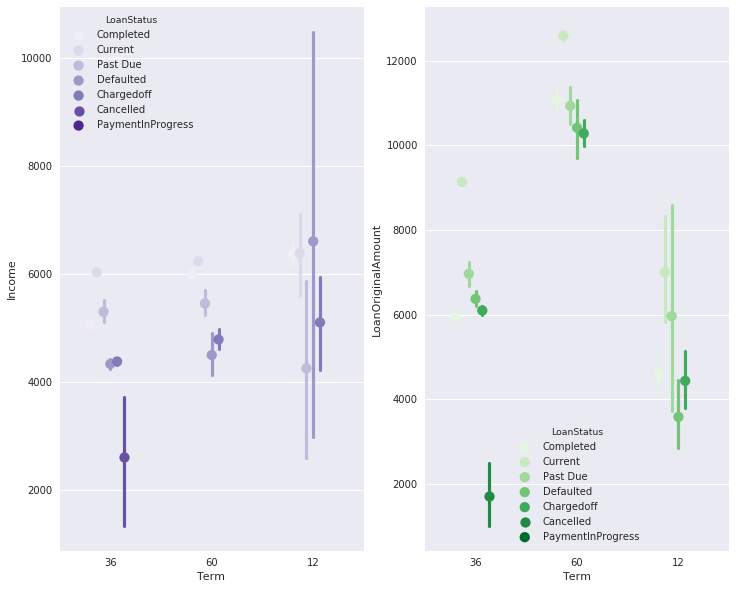

In [35]:
fig, ax = plt.subplots(ncols=2, figsize=[12,10])
sb.pointplot(data = Loan, x = 'Term', y = 'Income', hue = 'LoanStatus',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = Loan, x = 'Term', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

*Conclusion*

I extended my investigation to checking the imapct of term and APR on the repayment of loan.From the bivariate plots, 

Loans withs 12 month term with high APR seems to have resulted to bad loans compared to the other category. Even this reflected in the high income earners analysis too as most of the loans were seen under the past due category.

there are indications that the higher the earning of the borrower, the higher the chances that the borrower will have access to a high amount of loan.





In [ ]:
!jupyter nbconvert Part_I_exploration_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_I_exploration_template.ipynb to slides
[NbConvertApp] Writing 812886 bytes to Part_I_exploration_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_I_exploration_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/